<a href="https://colab.research.google.com/github/josephrinaldi4/Optimizing-Loan-Eligibility-Prediction-with-Machine-Learning/blob/main/Optimizing_Loan_Eligibility_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Classification - Loan Eligibility Prediction

----------------
## Context:
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses.

------------------
## Objective:
------------------

This is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan.

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands)
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## Importing necessary libraries and overview of the dataset - Add libraries as needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#Metrics to evaluate the model
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

#For tuning the model
from sklearn.model_selection import GridSearchCV

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore")

#Additional
from sklearn.impute import SimpleImputer

#### Loading data

In [ ]:
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


###**Perform pre-prosessing on the data:**
- Print info to determine dtypes and possible missing values
- Check for unique values and drop any unnecesary columns
- Define lists for numerical and categorical columns to explore them separately


#### Print the info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


####**Observation:**
- There are 13 columns and 614 observations.  
- 6 attributes have missing values (Gender, Married, Dependents, Self_Employed, Loan_Amount_Term and Credit_History).

- We will need to address the missing values.



####Check for unique values in every column

In [ ]:
#check for unique values in each column
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

####**Observation:**
- Loan_ID is a unique variable, and should be dropped.
- On the basis of number of observations in each column and the data description, we can identify the continuous and categorical columns in the data

Next, we will define lists for numerical and categorical columns so we can explore them separately.

In [ ]:
#Creating numerical columns
num_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#Creating categorical variables
cat_cols= ['Dependents','Gender','Married', 'Education','Self_Employed', 'Credit_History','Property_Area']

####**Address missing values:**
- To recall, 6 attributes have missing values (Gender, Married, Dependents, Self_Employed, Loan_Amount_Term and Credit_History).
- Replacing missing values with the mean, median, or 0's doesn't make sense in this context.
- Therefore, it makes sense to drop all rows which are missing these 6 attributes.


####**Drop Missing Values:**

In [ ]:
data.dropna(
   axis=0,
   how='any',
   inplace=True
)

####**Print info again, to confirm no missing values:**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            499 non-null    object 
 1   Gender             499 non-null    object 
 2   Married            499 non-null    object 
 3   Dependents         499 non-null    object 
 4   Education          499 non-null    object 
 5   Self_Employed      499 non-null    object 
 6   ApplicantIncome    499 non-null    int64  
 7   CoapplicantIncome  499 non-null    float64
 8   LoanAmount         499 non-null    int64  
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     499 non-null    float64
 11  Property_Area      499 non-null    object 
 12  Loan_Status        499 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 54.6+ KB


####**Perform univariate analysis of numerical columns**

In [ ]:
# check summary statistics
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,499.0,5336.128257,5618.157076,150.0,2885.5,3859.0,5825.0,81000.0
CoapplicantIncome,499.0,1566.995832,2580.954598,0.0,0.0,1086.0,2251.5,33837.0
LoanAmount,499.0,139.224449,83.684395,0.0,98.0,125.0,166.5,600.0
Loan_Amount_Term,499.0,342.012024,64.860368,36.0,360.0,360.0,360.0,480.0


####**Observations:**

- **Average applicant income is 5336.** It has a high range, from 150 to 81000, indicating good income diversity in the applicant pool.  This is very low compared to the max, which indicates there may be some extreme values in the pool.
- **Co-applicant income mean is 1567.**  As with average applicant income, this is very low compared to the max.
-**Loan amount varies greatly, as one would expect.** One would assume from the data that the outliers in the applicant income (ie, the max of 81000) are most likely aligned with this very high mortage amount (600) of the max.
-**Based on general knowledge of the mortgage industry, you would expect most mortgage's Loan_Amount_Term not exceed 360 months (or 30 years) in length.**  And, the 25%, 50% and 75% are all 360.  The min and max are outliers.



####**Explore these variables in more depth by observing their distributions**

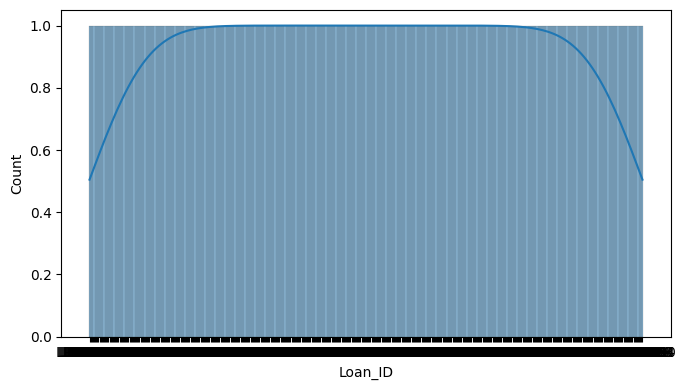

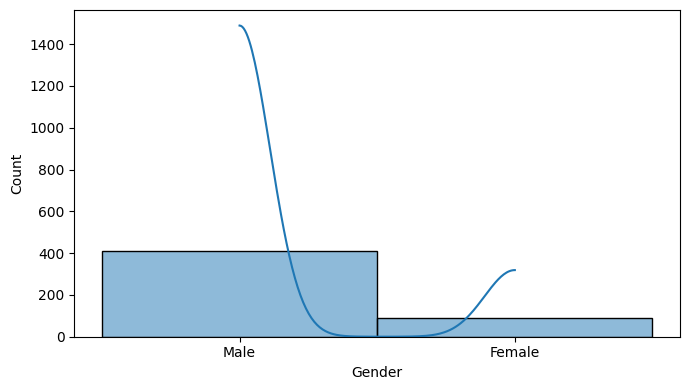

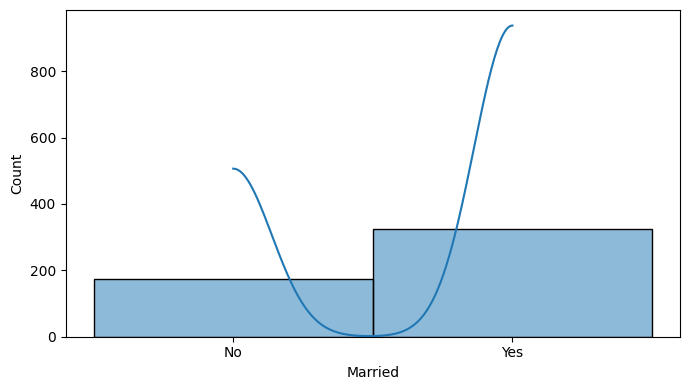

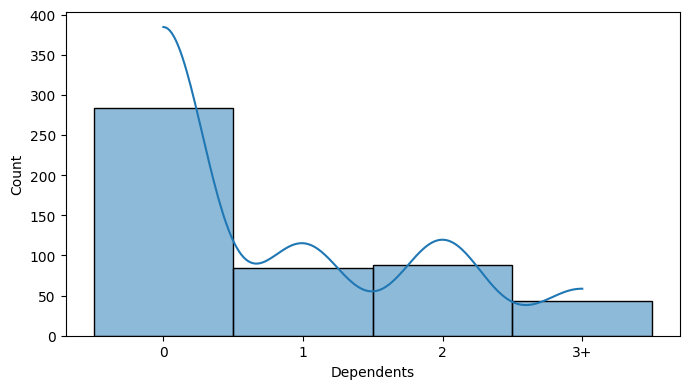

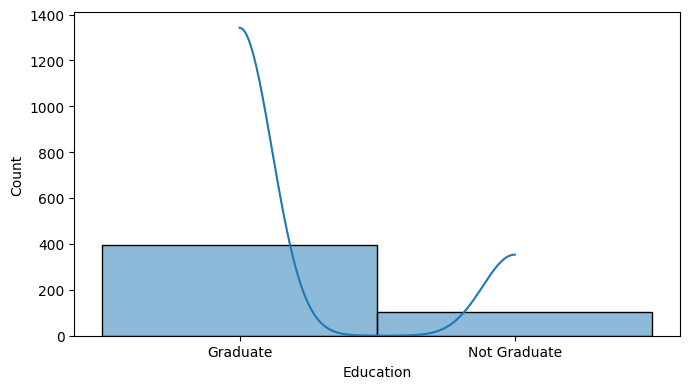

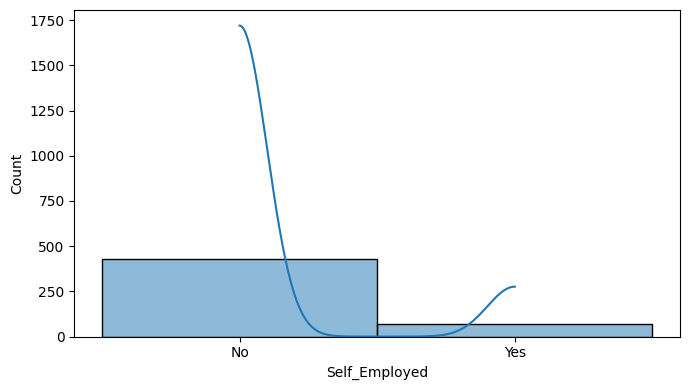

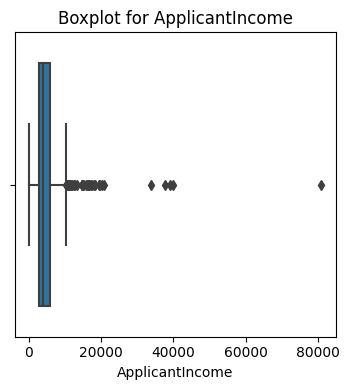

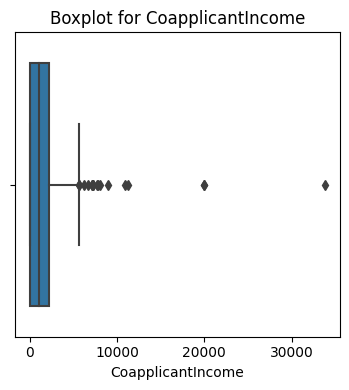

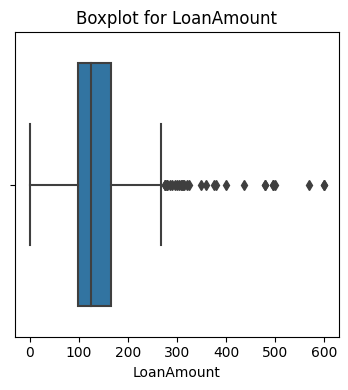

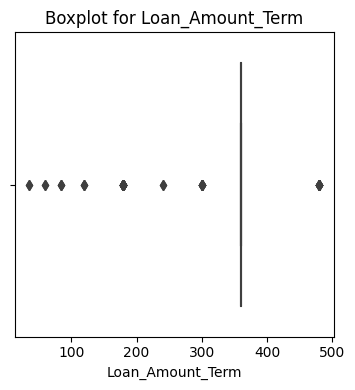

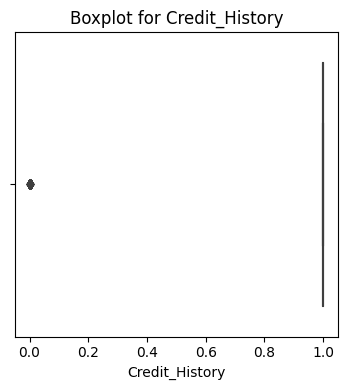

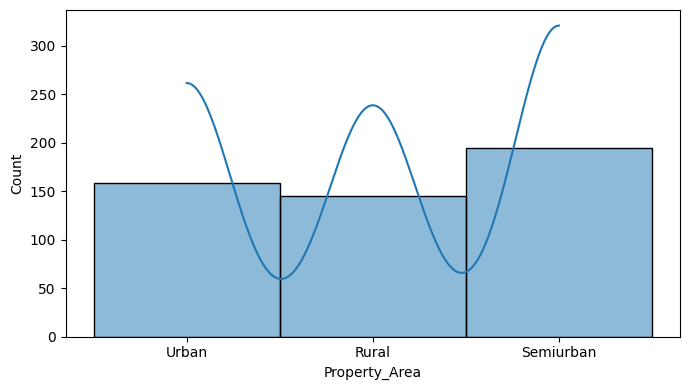

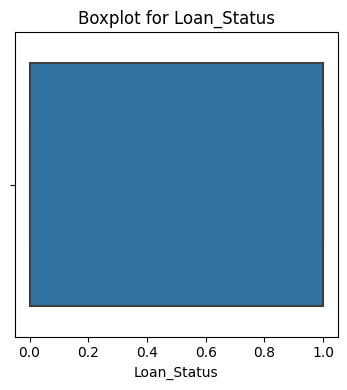

In [ ]:
for i in data.columns:
  plt.figure(figsize=(7,4))
  sns.histplot(data=data, x=i, kde = True)
  if data[i].dtype in ['int64', 'float64']:
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[i])
    plt.title(f'Boxplot for {i}')
  plt.tight_layout()
  plt.show()


####**Observations:**
-  **Applicant income is nearly normal distribution.**
- **Co-applicant income is right-skewed**


####**Explore via correlation heatmap**

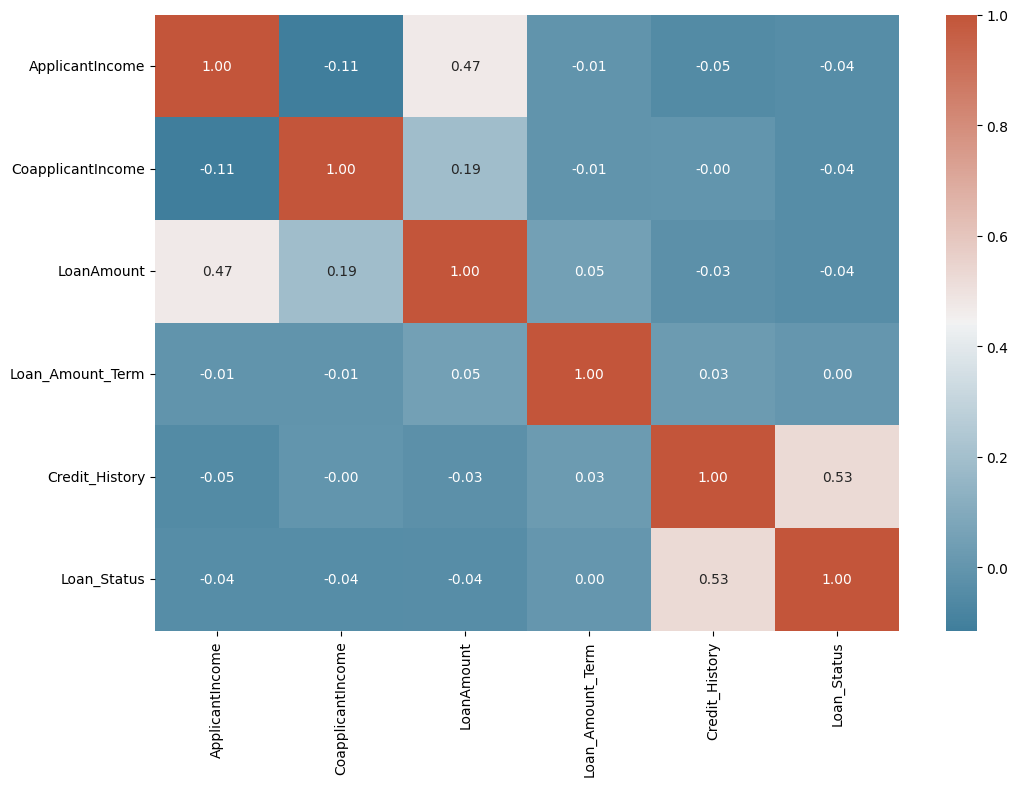

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()


####**Observations:**
- Applicant_Income and Loan_Amount are positively correlated
- Credit_History and Loan_Status are positively correlated

####**Perform univariate analysis for categorical variables**

In [ ]:
#Print the % sub categories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

0     0.569138
2     0.176353
1     0.168337
3+    0.086172
Name: Dependents, dtype: float64
****************************************
Male      0.823647
Female    0.176353
Name: Gender, dtype: float64
****************************************
Yes    0.649299
No     0.350701
Name: Married, dtype: float64
****************************************
Graduate        0.791583
Not Graduate    0.208417
Name: Education, dtype: float64
****************************************
No     0.861723
Yes    0.138277
Name: Self_Employed, dtype: float64
****************************************
1.0    0.851703
0.0    0.148297
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.390782
Urban        0.318637
Rural        0.290581
Name: Property_Area, dtype: float64
****************************************


####**Observations:*
- **By far, most applicants are male (82% vs 18% female)**  Because of this discrepancy, it may be worthwhile to explore the data further by separating out male and female applicants.
-**65% of applicants are married**  It would be expected that the married applicants would have the co-applicants with income, which would help in securing a higher-value mortage (or a mortgage at all).
-**Nearly 80% of applicants are graduates**, which would suggest that they have better jobs with higher, more steady income, and would better qualify for a loan.
-**Property area is split nearly evenly in thirds between semiurban, urban and rural**




##Check the relationship between loan status and numerical variables


In [ ]:
#Mean of numerical varibles grouped by loan status
data.groupby(['Loan_Status'])[num_cols].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
0,5703.620253,1728.113924,143.670886,341.620253
1,5165.853372,1492.342874,137.164223,342.193548


####**Normalizing the data**

In [ ]:
scaler = StandardScaler()

# Apply StandardScaler to the numerical features
data[num_cols] = scaler.fit_transform(data[num_cols])

Viewing the normalized data head

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.091380,-0.607747,-1.665354,0.277612,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,-0.134187,-0.022881,-0.134263,0.277612,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,-0.416235,-0.607747,-0.875885,0.277612,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,-0.490533,0.306785,-0.229956,0.277612,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,0.118284,-0.607747,0.021239,0.277612,1.0,Urban,1


####**Viewing the data after Normalization**

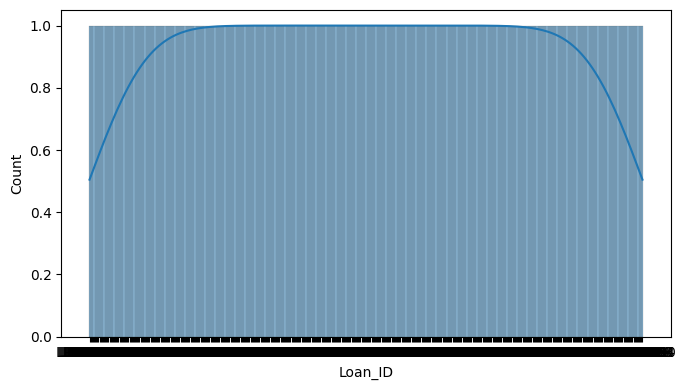

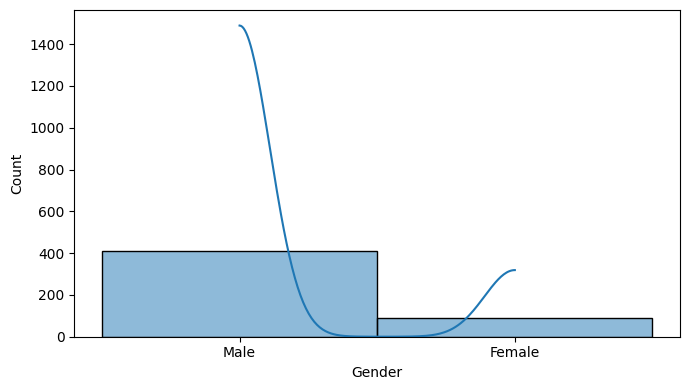

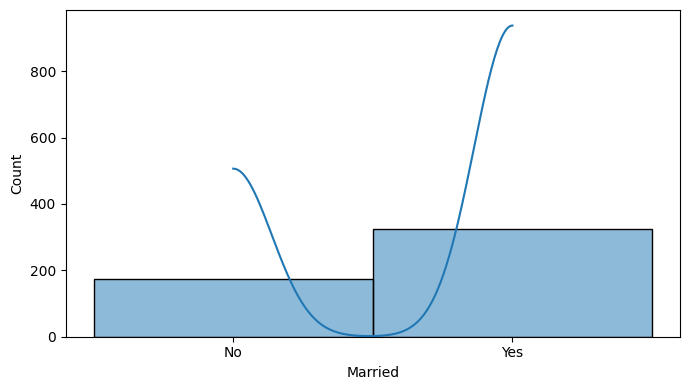

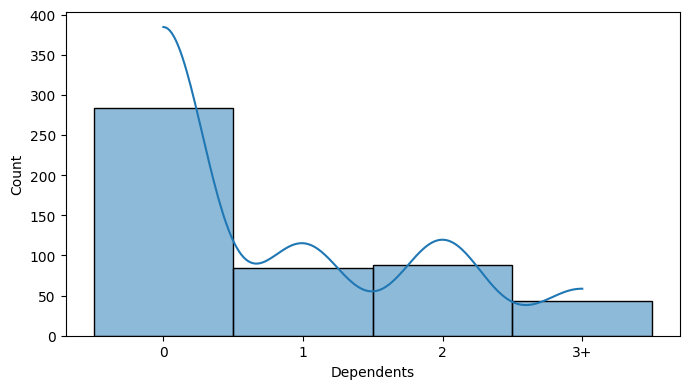

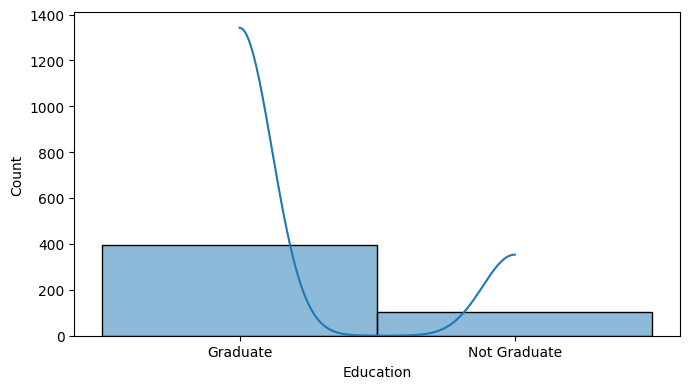

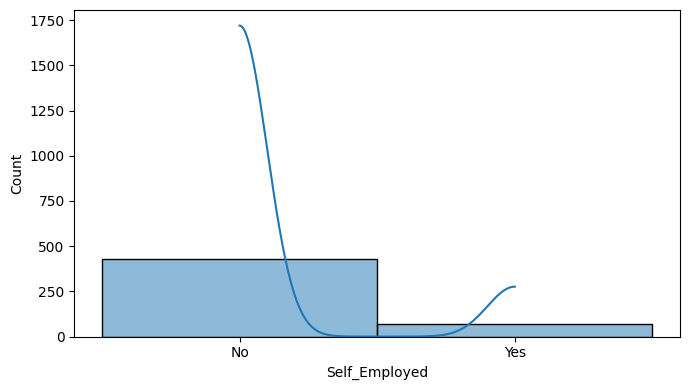

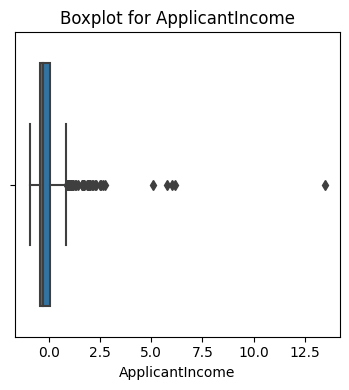

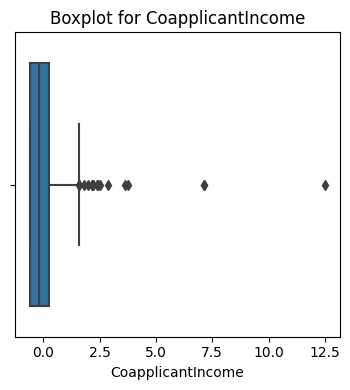

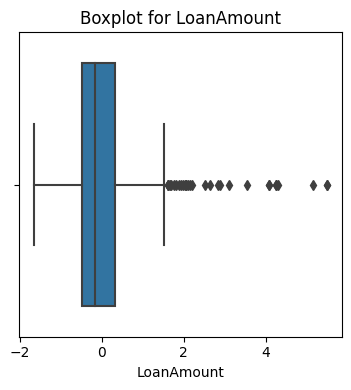

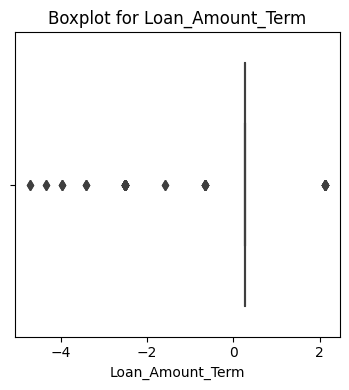

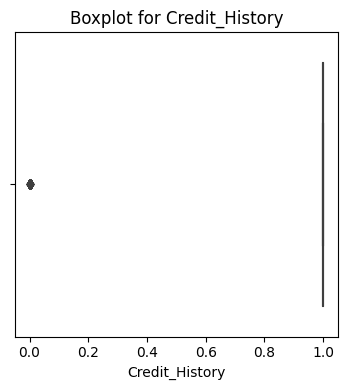

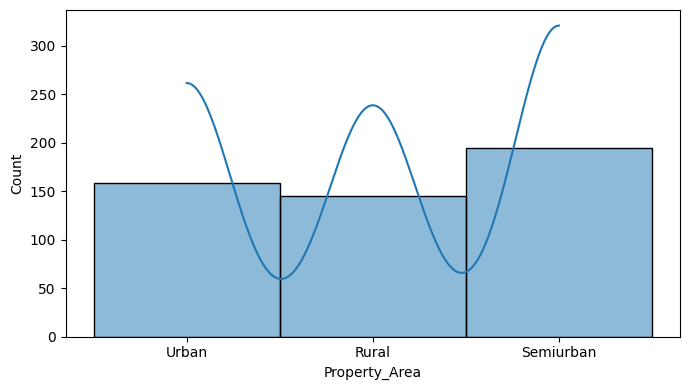

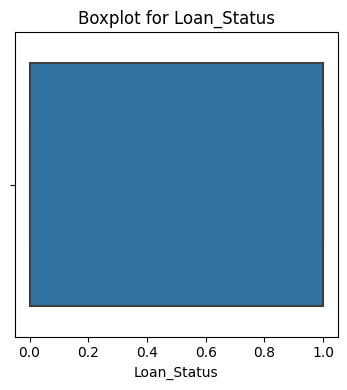

In [ ]:
for i in data.columns:
  plt.figure(figsize=(7,4))
  sns.histplot(data=data, x=i, kde = True)
  if data[i].dtype in ['int64', 'float64']:
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[i])
    plt.title(f'Boxplot for {i}')
  plt.tight_layout()
  plt.show()

###**Viewing the Heatmap after Normalization**

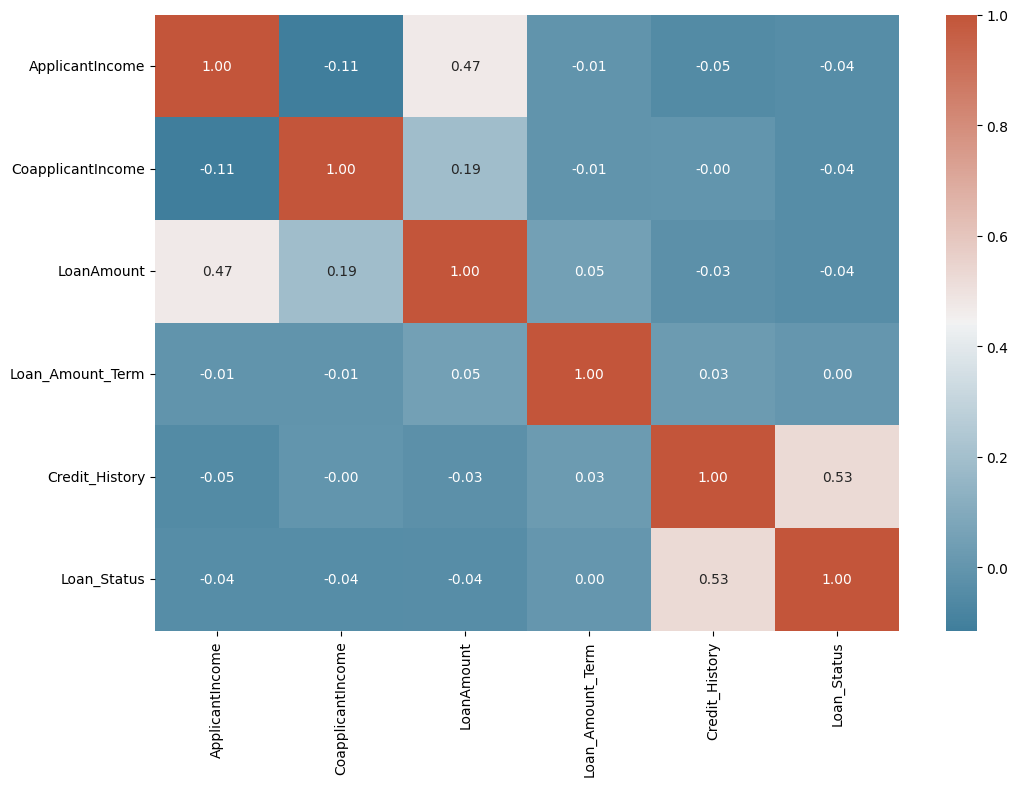

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()

##Now that we have explored the data, we will build the model.

####Model Building  - Approach:
1. Prepare data for modeling
2. Partition the data into training and testing sets.
3. Build the model on the training data.
4. Tune the model if needed.
5. Test the data on the testing set.



####Prepare data for modeling:  First, create dummy variables for categorical variables.  That way, we are dealing with numerical values only.  

In [ ]:
#creating list of dummy columns
to_get_dummies_for = ['Dependents','Gender', 'Married','Education','Self_Employed','Property_Area']

#creating dummy variables
data = pd.get_dummies(data = data, columns= to_get_dummies_for, drop_first= True)

#mapping Loan_Status
#dict_Loan_Status = {'Yes': 1, 'No':0}


#data['Loan_Status'] = data.Loan_Status.map(dict_Loan_Status)


####Split the data into training and testing sets

In [ ]:
# Drop unnecessary columns
X = data.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = data['Loan_Status']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

####Define the provided metrics_score() function

In [ ]:
def metrics_score(model, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')


####Found that there were null values the X_train in Credit_History and Loan_Amount_Term

In [ ]:
# Create an imputer with strategy 'median' for Loan_Amount_Term
imputer_loan_term = SimpleImputer(strategy='median')
X_train['Loan_Amount_Term'] = imputer_loan_term.fit_transform(X_train[['Loan_Amount_Term']])
X_test['Loan_Amount_Term'] = imputer_loan_term.transform(X_test[['Loan_Amount_Term']])

# Create an imputer with strategy 'most_frequent' for Credit_History
imputer_credit_history = SimpleImputer(strategy='most_frequent')
X_train['Credit_History'] = imputer_credit_history.fit_transform(X_train[['Credit_History']])
X_test['Credit_History'] = imputer_credit_history.transform(X_test[['Credit_History']])

# Now you can check if there are any missing values left
print(X_train.isnull().sum())
print(X_test.isnull().sum())

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


##**Time To Model!!**

##1.  Logistic Regression Model

In [ ]:
# Instantiate the logistic regression model
#print(y_test)
model_logistic = LogisticRegression()

# 1. Fit the model to the training data
model_logistic.fit(X_train, y_train)


# # 2. Generate predictions on the test set
y_pred_logistic = model_logistic.predict(X_test)

# # 3. Evaluate the model using the metrics_score function
metrics_score(model_logistic, X_test, y_test)

# # 4. Examine feature importances (coefficients for Logistic Regression)
feature_importances_logistic = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model_logistic.coef_[0]})
feature_importances_logistic = feature_importances_logistic.sort_values(by='Coefficient', ascending=False)
print(feature_importances_logistic)

Accuracy: 0.78, Precision: 0.746031746031746, Recall: 0.9894736842105263, F1 Score: 0.8506787330316742
                    Feature  Coefficient
4            Credit_History     3.012198
12  Property_Area_Semiurban     0.848704
9               Married_Yes     0.571972
1         CoapplicantIncome     0.197110
8               Gender_Male     0.157762
6              Dependents_2     0.131002
0           ApplicantIncome     0.066185
13      Property_Area_Urban     0.015887
11        Self_Employed_Yes     0.013889
7             Dependents_3+    -0.040474
3          Loan_Amount_Term    -0.223281
2                LoanAmount    -0.270431
5              Dependents_1    -0.367953
10   Education_Not Graduate    -0.444608


##2.  Decision Tree Model

In [ ]:
model_decision_tree = DecisionTreeClassifier(random_state=1)

# 1. Fit the model to the training data
model_decision_tree.fit(X_train, y_train)

# 2. Generate predictions on the test set
y_pred_decision_tree = model_decision_tree.predict(X_test)

# 3. Evaluate the model using the metrics_score function
metrics_score(model_decision_tree, X_test, y_test)

# 4. Examine feature importances for Decision Tree (if applicable)
# Decision Trees have a feature_importances_ attribute
if hasattr(model_decision_tree, 'feature_importances_'):
    feature_importances_tree = pd.DataFrame({'Feature': X_train.columns, 'Importance': model_decision_tree.feature_importances_})
    feature_importances_tree = feature_importances_tree.sort_values(by='Importance', ascending=False)
    print(feature_importances_tree)

Accuracy: 0.7466666666666667, Precision: 0.7821782178217822, Recall: 0.8315789473684211, F1 Score: 0.8061224489795918
                    Feature  Importance
4            Credit_History    0.283687
2                LoanAmount    0.241684
0           ApplicantIncome    0.210795
3          Loan_Amount_Term    0.051820
1         CoapplicantIncome    0.048326
8               Gender_Male    0.028745
7             Dependents_3+    0.027629
12  Property_Area_Semiurban    0.022357
10   Education_Not Graduate    0.021349
11        Self_Employed_Yes    0.019478
5              Dependents_1    0.016961
13      Property_Area_Urban    0.013774
9               Married_Yes    0.013396
6              Dependents_2    0.000000


##**Check confusion matrix / Model perfomance**


In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#1. Logistic Regression Model

              precision    recall  f1-score   support

           0       0.89      0.46      0.60       103
           1       0.81      0.98      0.89       246

    accuracy                           0.82       349
   macro avg       0.85      0.72      0.74       349
weighted avg       0.83      0.82      0.80       349



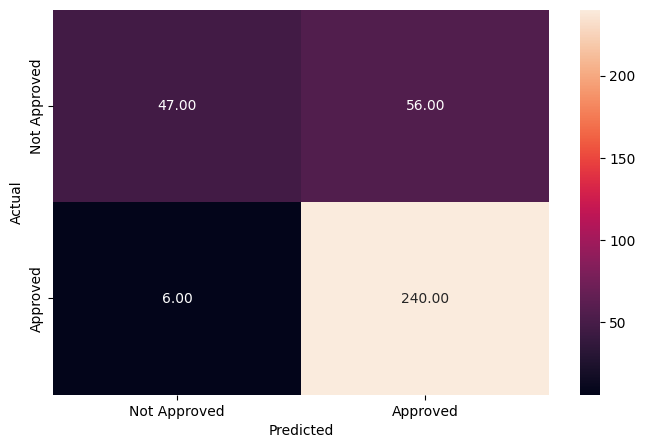

In [ ]:
imal # Checking model performance of logistic regression on training set
y_pred_train_logistic = model_logistic.predict(X_train)
metrics_score(y_train, y_pred_train_logistic)

              precision    recall  f1-score   support

           0       0.96      0.42      0.58        55
           1       0.75      0.99      0.85        95

    accuracy                           0.78       150
   macro avg       0.85      0.70      0.72       150
weighted avg       0.82      0.78      0.75       150



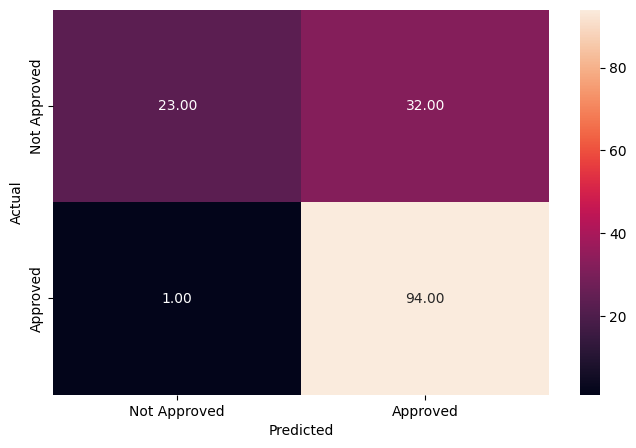

In [ ]:
# Checking model performance of logistic regression on testing set
y_pred_test_logistic = model_logistic.predict(X_test)
metrics_score(y_test, y_pred_test_logistic)

##Logistic Regression Observations:

The Logistic Regression model exhibits a notable difference in performance between the training and testing sets, indicating some degree of overfitting or a lack of generalization to new data.

On the training set, the model achieved a high accuracy, precision, recall, and F1-score. However, on the testing set, the performance metrics dropped, especially for precision and recall. This suggests that the model may not generalize well to new, unseen data, and there could be some level of overfitting.

##Examine feature importance for Logistic Regression##

In [ ]:
# Feature Importance for Logistic Regression
importances_logistic = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Coefficient': model_logistic.coef_[0]
})

importances_logistic = importances_logistic.sort_values(by='Coefficient', ascending=False)
print(importances_logistic)

                  Attribute  Coefficient
4            Credit_History     3.012198
12  Property_Area_Semiurban     0.848704
9               Married_Yes     0.571972
1         CoapplicantIncome     0.197110
8               Gender_Male     0.157762
6              Dependents_2     0.131002
0           ApplicantIncome     0.066185
13      Property_Area_Urban     0.015887
11        Self_Employed_Yes     0.013889
7             Dependents_3+    -0.040474
3          Loan_Amount_Term    -0.223281
2                LoanAmount    -0.270431
5              Dependents_1    -0.367953
10   Education_Not Graduate    -0.444608


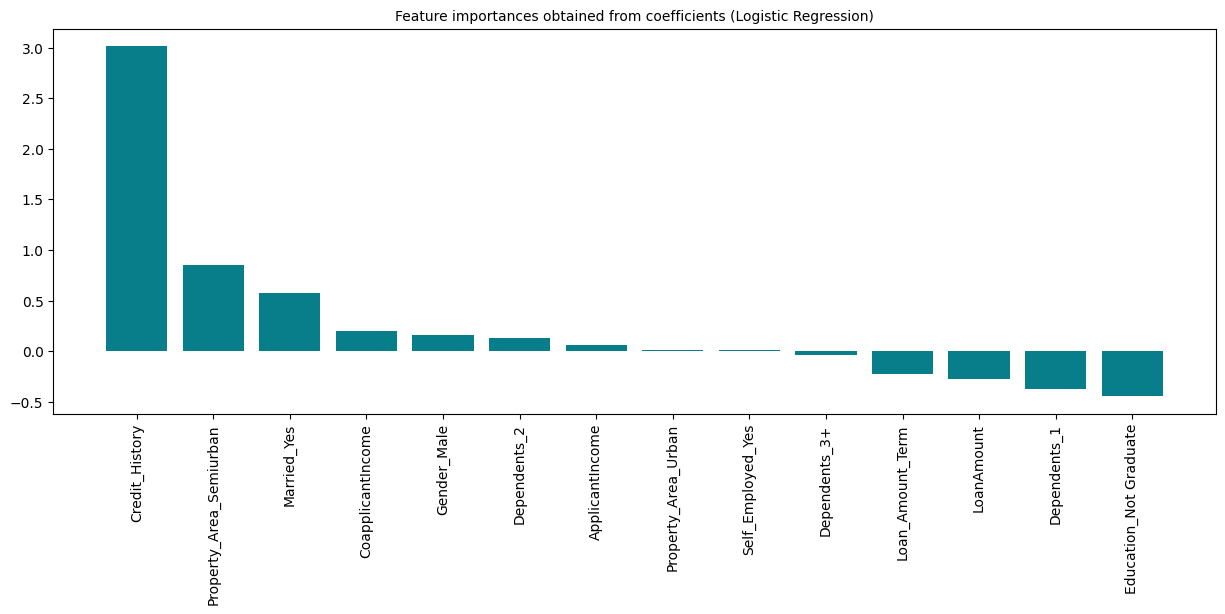

In [ ]:
# Define figure size for a single plot
plt.figure(figsize=(15, 5))

# Bar plot for feature importances
plt.bar(x=importances_logistic['Attribute'], height=importances_logistic['Coefficient'], color='#087E8B')
plt.title('Feature importances obtained from coefficients (Logistic Regression)', size=10)
plt.xticks(rotation='vertical')
plt.show()

##Observations:

The model highlights that a positive credit history, being married, residing in a semiurban area, and higher coapplicant income significantly increase the likelihood of loan approval, while factors such as having more dependents, longer loan terms, and larger loan amounts negatively impact the approval chances. Notably, educational background, with being a graduate, positively influences approval

#2. Decision Tree Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       246

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



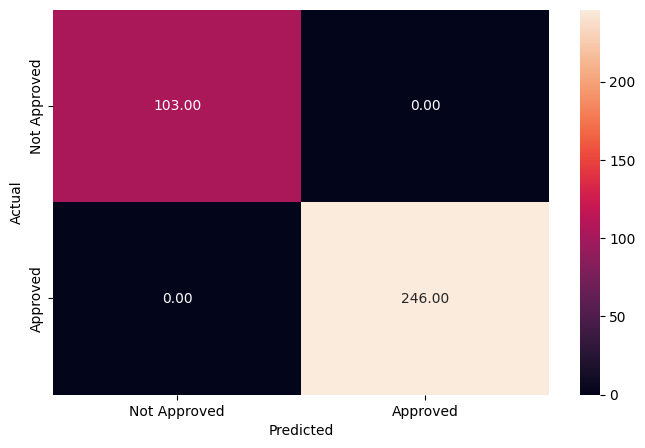

In [ ]:
#checking model performace of model_decision_tree
y_pred_train_model_decision_tree = model_decision_tree.predict(X_train)
metrics_score(y_train, y_pred_train_model_decision_tree)

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        55
           1       0.78      0.83      0.81        95

    accuracy                           0.75       150
   macro avg       0.73      0.72      0.72       150
weighted avg       0.74      0.75      0.74       150



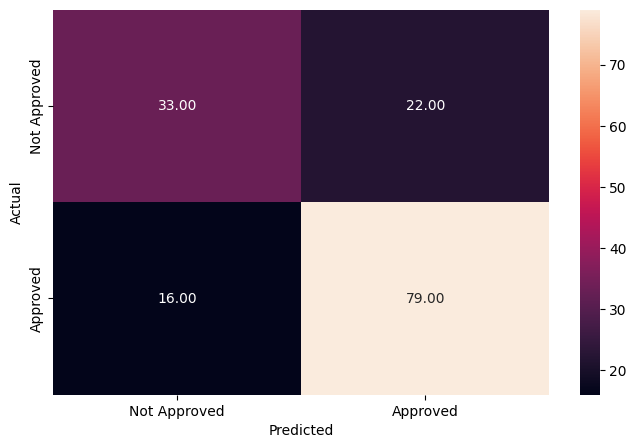

In [ ]:
#checking model performace of dt
y_pred_test_model_decision_tree = model_decision_tree.predict(X_test)
metrics_score(y_test, y_pred_test_model_decision_tree)

##Decison Tree Observations:

The performance metrics on the training set for the Decision Tree model are perfect (precision, recall, and F1-score all equal to 1.00). This indicates that the model has memorized the training data, leading to potential overfitting. The model may not generalize well to new, unseen data.

In contrast, on the testing set, the Decision Tree model shows a drop in performance, with lower precision, recall, and F1-score. This suggests that the model is not performing as well on new data, indicating overfitting.

##Examine feature importance for Decision Tree##



In [ ]:

# Feature Importance for Decision Tree
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_decision_tree.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
print(importances)


                  Attribute  Importance
4            Credit_History    0.283687
2                LoanAmount    0.241684
0           ApplicantIncome    0.210795
3          Loan_Amount_Term    0.051820
1         CoapplicantIncome    0.048326
8               Gender_Male    0.028745
7             Dependents_3+    0.027629
12  Property_Area_Semiurban    0.022357
10   Education_Not Graduate    0.021349
11        Self_Employed_Yes    0.019478
5              Dependents_1    0.016961
13      Property_Area_Urban    0.013774
9               Married_Yes    0.013396
6              Dependents_2    0.000000


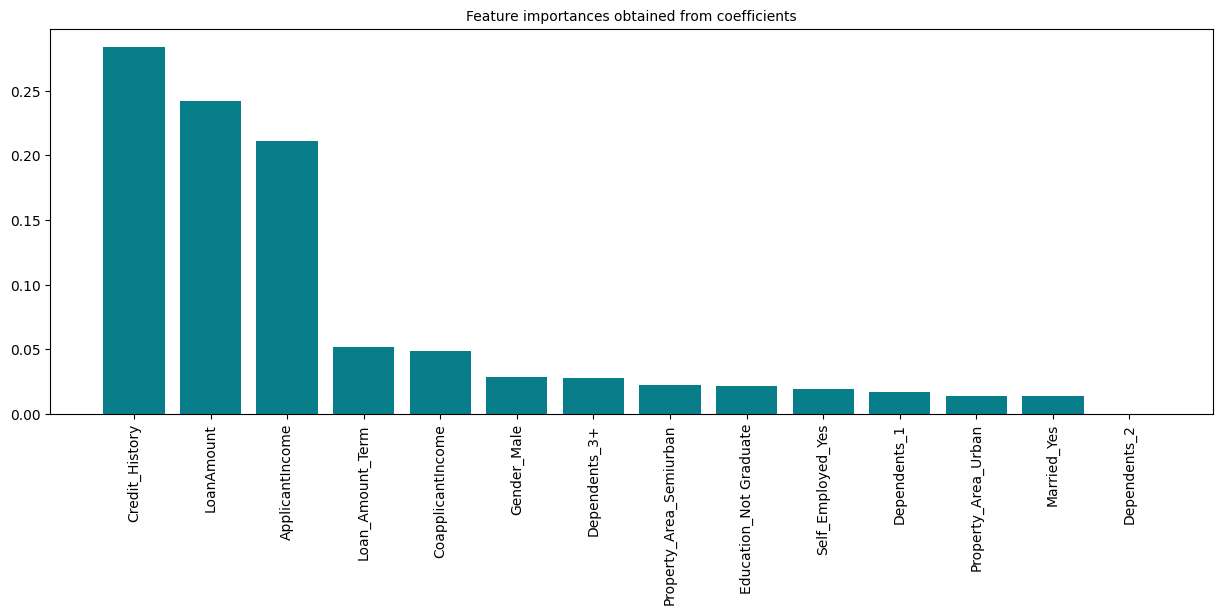

In [ ]:
# Define figure size for a single plot
plt.figure(figsize=(15, 5))

# Bar plot for feature importances
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

##Observations:

The model assigns the highest importance to Credit_History (0.2837), followed by LoanAmount (0.2417) and ApplicantIncome (0.2108), indicating their significant influence on the model's decision-making. Other features such as Loan_Amount_Term, CoapplicantIncome, and certain demographic factors also contribute to the model's predictions, albeit not nearly as significantly as the first three, while the presence of Dependents_2 seems to have negligible impact with an importance score of 0.